# Examining zed and force plate signals

The two devices started recording at different time and have different frequencies (fp at 100 Hz, zed at ~25 Hz).  
We are able to detect the start of the stepping forward in the zed data and the first foot touch in the force plate data,  
They are not the exact same event but relativly close.

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import load_and_process_zed_data, load_and_process_force_plate_data, trim_dataframe_with_window

In [3]:
force_plate_file_path = "../data/raw/older_adults/ann/ann_force_plate/ann_eyes_open1.txt"
df_fp = load_and_process_force_plate_data(force_plate_file_path)

zed_file_path = "../data/raw/older_adults/ann/ann_zed/ann_eyes_open1.csv"
_, df_com = load_and_process_zed_data(zed_file_path)

In [82]:
df_fp_trimmed = trim_dataframe_with_window(df_fp, 'time (s)', 'Fz', frames_num=50)
df_com_trimmed = trim_dataframe_with_window(df_com, 'time (s)', 'COM_AP', frames_num=100)

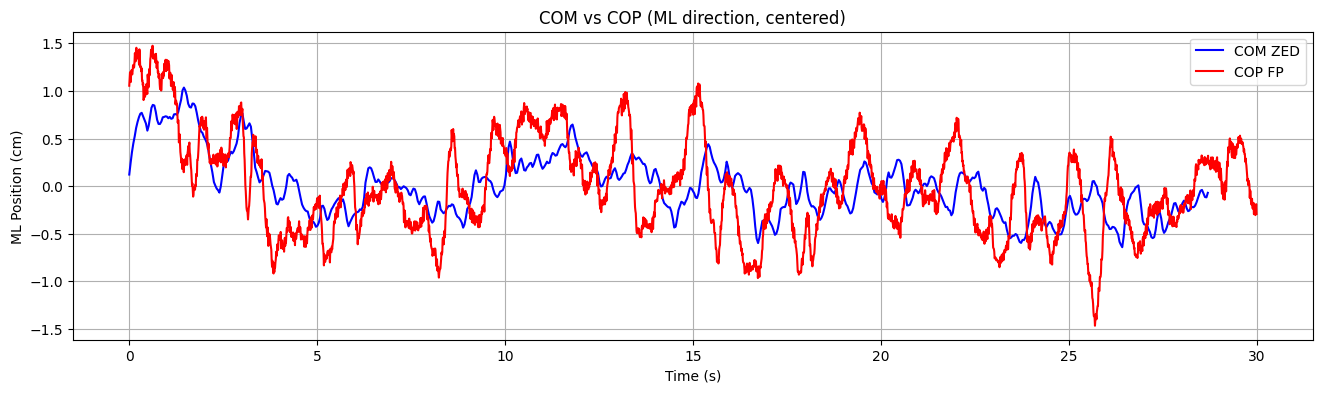

In [86]:
plt.figure(figsize=(16, 4))

# Align all time axes to start at 0
time_fp = df_fp_trimmed["time (s)"] - df_fp_trimmed["time (s)"].iloc[0]
time_zed = df_com_trimmed["time (s)"] - df_com_trimmed["time (s)"].iloc[0]

# -------------------- ML Direction --------------------
com_ml_centered = df_com_trimmed["COM_ML"] - df_com_trimmed["COM_ML"].mean()
cop_ml_centered = df_fp_trimmed["Ax"] - df_fp_trimmed["Ax"].mean()

plt.plot(time_zed, com_ml_centered, label="COM ZED", color='blue')
plt.plot(time_fp, cop_ml_centered, label="COP FP", color='red')

plt.xlabel("Time (s)")
plt.ylabel("ML Position (cm)")
plt.title("COM vs COP (ML direction, centered)")
plt.legend()
plt.grid(True)
plt.show()
